In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_excel('/content/Quote-Equity-SBIN-EQ-15-07-2021-to-15-07-2022.xlsx',parse_dates=True,index_col='Date ')

In [ ]:
df.head()

,series,OPEN,HIGH,LOW,PREV. CLOSE,ltp,close,vwap,52W H,52W L,VOLUME,VALUE,No of trades
Date,,,,,,,,,,,,,
2022-07-15,EQ,482.55,484.40,474.70,479.35,478.70,479.10,478.30,549.0,401.25,6945602,"3,322,054,772.00",120161
2022-07-14,EQ,486.60,488.90,476.80,486.50,480.30,479.35,482.03,549.0,401.25,9385630,"4,524,120,598.85",151617
2022-07-13,EQ,487.75,492.45,484.55,484.95,486.20,486.50,488.27,549.0,401.25,8208853,"4,008,106,035.85",129820
2022-07-12,EQ,485.00,491.35,483.10,488.20,483.40,484.95,488.66,549.0,401.25,7364457,"3,598,704,148.85",108367
2022-07-11,EQ,485.00,491.30,485.00,488.55,488.05,488.20,488.75,549.0,401.25,7704792,"3,765,716,046.15",94857


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 250 entries, 2022-07-15 to 2021-07-15
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   series         250 non-null    object 
 1   OPEN           250 non-null    float64
 2   HIGH           250 non-null    float64
 3   LOW            250 non-null    float64
 4   PREV. CLOSE    250 non-null    float64
 5   ltp            250 non-null    float64
 6   close          250 non-null    float64
 7   vwap           250 non-null    float64
 8   52W H          250 non-null    float64
 9   52W L          250 non-null    float64
 10  VOLUME         250 non-null    int64  
 11  VALUE          250 non-null    object 
 12  No of trades   250 non-null    int64  
dtypes: float64(9), int64(2), object(2)
memory usage: 27.3+ KB


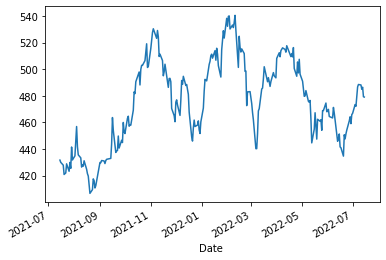

In [ ]:
df['close '].plot()

In [ ]:
len(df)

250

In [ ]:
sbi_close=df['close ']

In [ ]:
sbi_close.reset_index(drop=True,inplace=True)
sbi_close.shape

(250,)

In [ ]:
sbi_close=pd.DataFrame(sbi_close)

In [ ]:
train=sbi_close.iloc[:200]
test=sbi_close.iloc[200:25]

In [ ]:
from sklearn.preprocessing import MinMaxScaler


In [ ]:
scaler=MinMaxScaler()


In [ ]:
scaler.fit(train)


MinMaxScaler()

In [ ]:
scaled_train=scaler.transform(train)
scaled_test=scaler.transform(test)

In [ ]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

CREATING THE MODEL

In [ ]:
test.shape

(50, 1)

In [ ]:
length=50
batch_size=32
generator = TimeseriesGenerator(scaled_train,scaled_train,
                                length=length,batch_size=batch_size)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense ,SimpleRNN,LSTM,Dropout

In [ ]:
n_features = 1

In [ ]:
model = Sequential()
model.add(SimpleRNN(30,input_shape=(length,n_features)))
model.add(Dropout(rate=0.2))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 30)                960       
                                                                 
 dropout (Dropout)           (None, 30)                0         
                                                                 
 dense (Dense)               (None, 1)                 31        
                                                                 
Total params: 991
Trainable params: 991
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit_generator(generator,epochs=10,shuffle=False)

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


5/5 [==============================] - 1s 11ms/step - loss: 0.0899
Epoch 2/10
5/5 [==============================] - 0s 9ms/step - loss: 0.0950
Epoch 3/10
5/5 [==============================] - 0s 10ms/step - loss: 0.0705
Epoch 4/10
5/5 [==============================] - 0s 9ms/step - loss: 0.0591
Epoch 5/10
5/5 [==============================] - 0s 9ms/step - loss: 0.0565
Epoch 6/10
5/5 [==============================] - 0s 10ms/step - loss: 0.0516
Epoch 7/10
5/5 [==============================] - 0s 10ms/step - loss: 0.0465
Epoch 8/10
5/5 [==============================] - 0s 9ms/step - loss: 0.0470
Epoch 9/10
5/5 [==============================] - 0s 9ms/step - loss: 0.0398
Epoch 10/10
5/5 [==============================] - 0s 11ms/step - loss: 0.0339


In [ ]:
losses=pd.DataFrame(model.history.history)

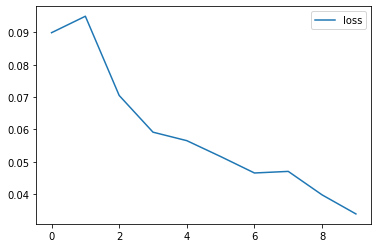

In [ ]:
losses.plot()

Evaluate test set

In [ ]:
first_eval_batch=scaled_train[-length:]

In [ ]:
first_eval_batch

array([[0.50968351],
       [0.53708077],
       [0.39678791],
       [0.28908833],
       [0.36324988],
       [0.39962211],
       [0.38356164],
       [0.24421351],
       [0.28719887],
       [0.33821445],
       [0.52763344],
       [0.5521965 ],
       [0.55125177],
       [0.48842702],
       [0.65281058],
       [0.59943316],
       [0.5706188 ],
       [0.67879074],
       [0.72413793],
       [0.7076051 ],
       [0.8474256 ],
       [0.89230043],
       [0.83656117],
       [0.90458196],
       [0.87812943],
       [0.82191781],
       [0.76523382],
       [0.63722248],
       [0.62966462],
       [0.79782711],
       [0.73547473],
       [0.67831838],
       [0.64478035],
       [0.64478035],
       [0.61596599],
       [0.50543222],
       [0.59754369],
       [0.52810581],
       [0.44402456],
       [0.45630609],
       [0.32640529],
       [0.22012282],
       [0.21917808],
       [0.21256495],
       [0.28341993],
       [0.26877657],
       [0.16013226],
       [0.172

In [ ]:
first_eval_batch=first_eval_batch.reshape((1,length,1))

In [ ]:
first_eval_batch

array([[[0.50968351],
        [0.53708077],
        [0.39678791],
        [0.28908833],
        [0.36324988],
        [0.39962211],
        [0.38356164],
        [0.24421351],
        [0.28719887],
        [0.33821445],
        [0.52763344],
        [0.5521965 ],
        [0.55125177],
        [0.48842702],
        [0.65281058],
        [0.59943316],
        [0.5706188 ],
        [0.67879074],
        [0.72413793],
        [0.7076051 ],
        [0.8474256 ],
        [0.89230043],
        [0.83656117],
        [0.90458196],
        [0.87812943],
        [0.82191781],
        [0.76523382],
        [0.63722248],
        [0.62966462],
        [0.79782711],
        [0.73547473],
        [0.67831838],
        [0.64478035],
        [0.64478035],
        [0.61596599],
        [0.50543222],
        [0.59754369],
        [0.52810581],
        [0.44402456],
        [0.45630609],
        [0.32640529],
        [0.22012282],
        [0.21917808],
        [0.21256495],
        [0.28341993],
        [0

In [ ]:
model.predict(first_eval_batch)

array([[0.17036825]], dtype=float32)

In [ ]:
scaled_test[0]

array([0.11242324])

////

In [ ]:
test_predictions =[]
first_eval_batch =scaled_train[-length: ]
current_batch=first_eval_batch.reshape((1, length, n_features ))
for i in range(len(test)):
# get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of (array])
  current_pred = model.predict(current_batch) [0]
#store prediction
  test_predictions.append(current_pred)
# update batch to now include prediction and drop first value
  current_batch = np.append(current_batch[:,1:,:], [[current_pred]],axis=1)

In [ ]:
test_predictions

[array([0.17036825], dtype=float32),
 array([0.1856125], dtype=float32),
 array([0.12126873], dtype=float32),
 array([0.08603953], dtype=float32),
 array([0.14266005], dtype=float32),
 array([0.04206832], dtype=float32),
 array([0.0465005], dtype=float32),
 array([0.10231782], dtype=float32),
 array([-0.00560712], dtype=float32),
 array([0.01978011], dtype=float32),
 array([0.0887991], dtype=float32),
 array([-0.0912746], dtype=float32),
 array([-0.06208401], dtype=float32),
 array([-0.03745965], dtype=float32),
 array([-0.1217147], dtype=float32),
 array([-0.27304456], dtype=float32),
 array([-0.140686], dtype=float32),
 array([-0.34501174], dtype=float32),
 array([-0.44160724], dtype=float32),
 array([-0.23113662], dtype=float32),
 array([-0.47048604], dtype=float32),
 array([-0.52395445], dtype=float32),
 array([-0.3466343], dtype=float32),
 array([-0.5859357], dtype=float32),
 array([-0.5489162], dtype=float32),
 array([-0.4870207], dtype=float32),
 array([-0.5814638], dtype=float3

In [ ]:
true_predictions = scaler.inverse_transform(test_predictions)

In [ ]:
true_predictions

array([[452.73347971],
       [454.34708309],
       [447.53629553],
       [443.80728407],
       [449.80056646],
       [439.15293181],
       [439.62207796],
       [445.53034098],
       [434.10648588],
       [436.7937247 ],
       [444.09938517],
       [425.03858393],
       [428.12840736],
       [430.73489614],
       [421.81649861],
       [405.79823371],
       [419.80838633],
       [398.18050722],
       [387.95587398],
       [410.23418877],
       [384.89905215],
       [379.23942135],
       [398.0087595 ],
       [372.6787049 ],
       [376.59721804],
       [383.14885878],
       [373.15205531],
       [360.10994737],
       [380.92984497],
       [371.75027538],
       [352.24789899],
       [380.4920277 ],
       [367.55913118],
       [354.01476429],
       [383.0413603 ],
       [366.04721238],
       [358.97170701],
       [377.07679559],
       [370.28468469],
       [356.37793906],
       [373.44702077],
       [372.46425683],
       [351.27129278],
       [373

In [ ]:
test['predictions']=true_predictions

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
test

,close,predictions
200,446.60,452.733480
201,440.75,454.347083
202,449.80,447.536296
203,438.85,443.807284
204,438.80,449.800566
205,437.45,439.152932
206,454.10,439.622078
207,463.70,445.530341
208,443.85,434.106486
209,433.00,436.793725
